In [3]:
import requests
import geopandas as gpd

# Construct the query URL
query_url = "https://maps.water.noaa.gov/server/rest/services/nwm/srf_18hr_max_high_flow_magnitude/MapServer/0/query"
params = {
    'where': '1=1',
    'outFields': '*',
    'outSR': '4326',  # Specify output spatial reference if needed
    'f': 'geojson',  # Request geojson output
    'returnGeometry': 'true'
}

# Make the request
response = requests.get(query_url, params=params)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

print(gdf.head())


                                            geometry feature_id  \
0  LINESTRING (-99.06210 27.01728, -99.06241 27.0...     324475   
1  LINESTRING (-99.06101 27.01713, -99.06112 27.0...     324725   
2  LINESTRING (-98.97001 27.30959, -98.97053 27.3...     325111   
3  LINESTRING (-98.94495 27.24970, -98.94502 27.2...     325113   
4  LINESTRING (-98.96233 27.23611, -98.96243 27.2...     325115   

             name  strm_order    huc6 state  nwm_vers  \
0  Unnamed Stream           1  130800    TX         3   
1  Unnamed Stream           1  130800    TX         3   
2  Albercas Creek           1  130800    TX         3   
3  Unnamed Stream           1  130800    TX         3   
4  Unnamed Stream           1  130800    TX         3   

            reference_time  max_flow recur_cat  high_water_threshold  \
0  2024-06-25 13:00:00 UTC      0.71       >50                  0.41   
1  2024-06-25 13:00:00 UTC      0.35       >50                  0.17   
2  2024-06-25 13:00:00 UTC      2.12  

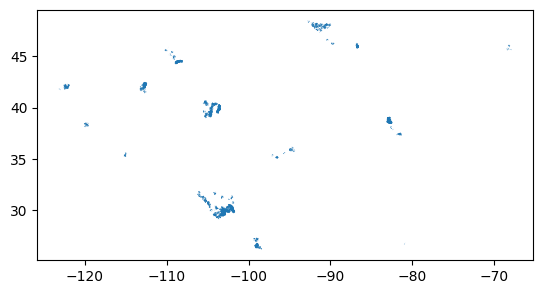

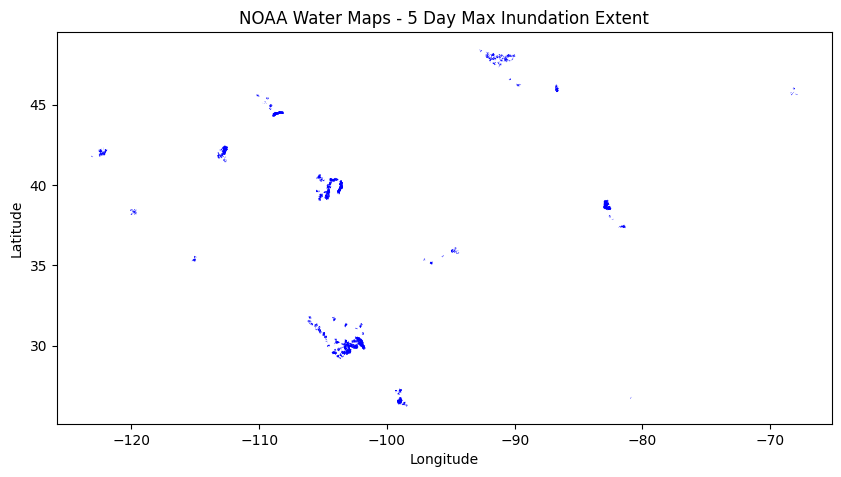

In [4]:
# plot the geodataframe
import matplotlib.pyplot as plt

# Basic Plot
gdf.plot()

# Enhanced Plot
gdf.plot(figsize=(10, 6), color='blue', edgecolor='black')

plt.title('NOAA Water Maps - 5 Day Max Inundation Extent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [5]:
# Export GeoDataFrame as a Shapefile
gdf.to_file("C:/Users/Lyn/Documents/Programming/Python_codes/CUAHSI Summer Institute 2024/18hr_highflow_test.shp")

C:\Users\Lyn\AppData\Local\Temp\ipykernel_8344\4269308896.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("C:/Users/Lyn/Documents/Programming/Python_codes/CUAHSI Summer Institute 2024/18hr_highflow_test.shp")
